In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import sys
sys.path.append(str(Path.cwd().parents[1]))
from handle_results import HandleResults

In [3]:
home_folder = Path.cwd().parents[1]
plot_folder = home_folder.joinpath(home_folder, 'Plots')
path = home_folder.joinpath(home_folder, 'CSV_results')
df_info = pd.read_csv(path.joinpath('dataset_info.csv'))
df = pd.read_csv(path.joinpath('Cross_validation', 'Cross_validation.csv'), index_col=0)
HR = HandleResults()

# Bars total

In [13]:
metrics = ['balanced_accuracy','G_mean','f1','precision','recall','pr_auc']
a = pd.concat([HR.ranking_oversampler(df, metric) for metric in metrics],axis=1)
a = a.iloc[:,~a.columns.str.contains('_std')]

<AxesSubplot:>

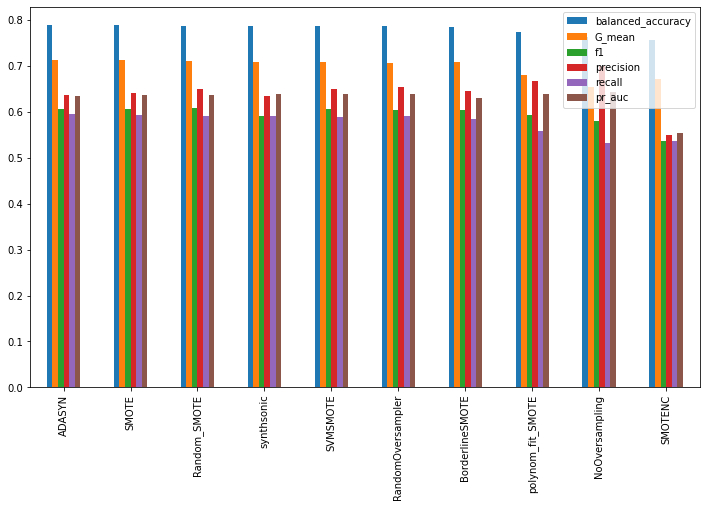

In [14]:
a.plot.bar(figsize=(12,7))

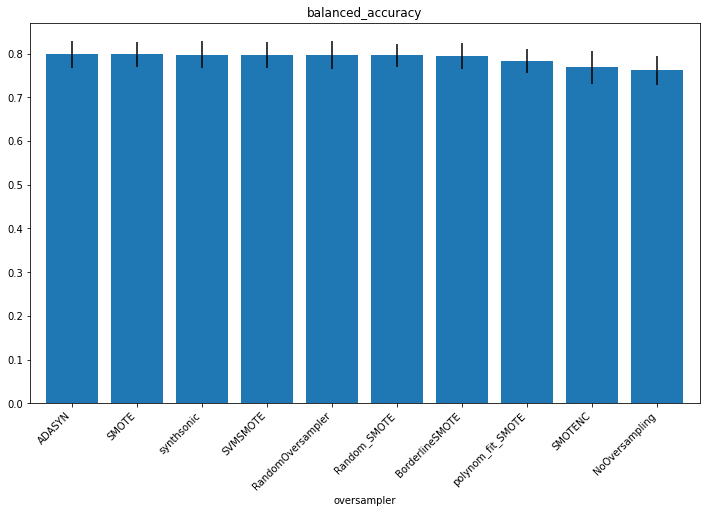

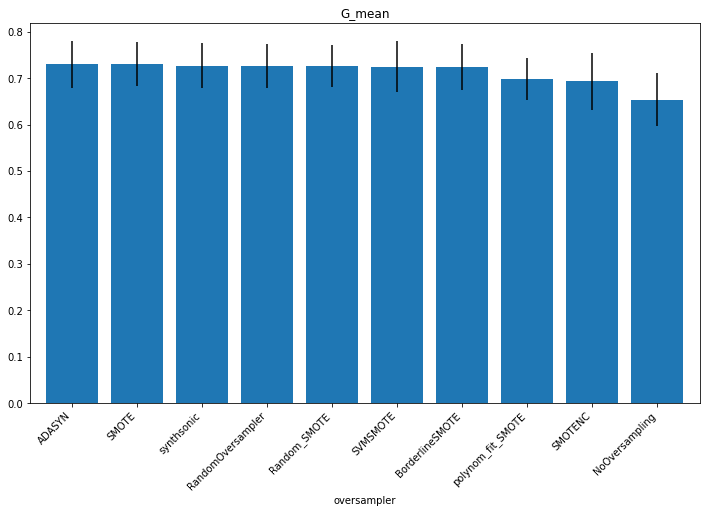

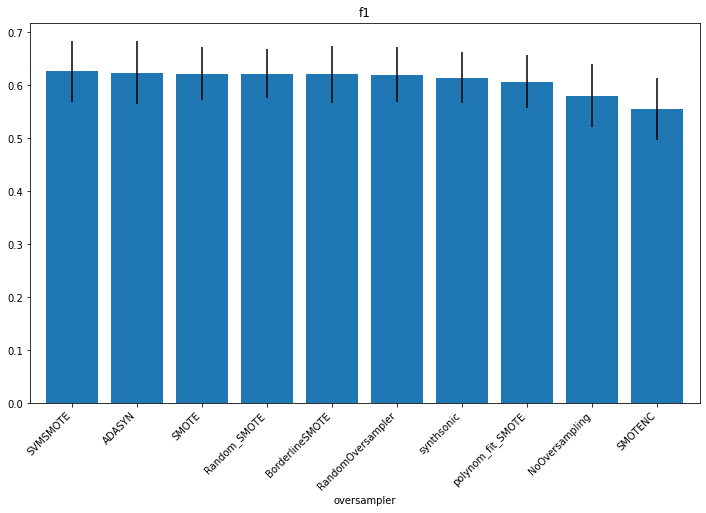

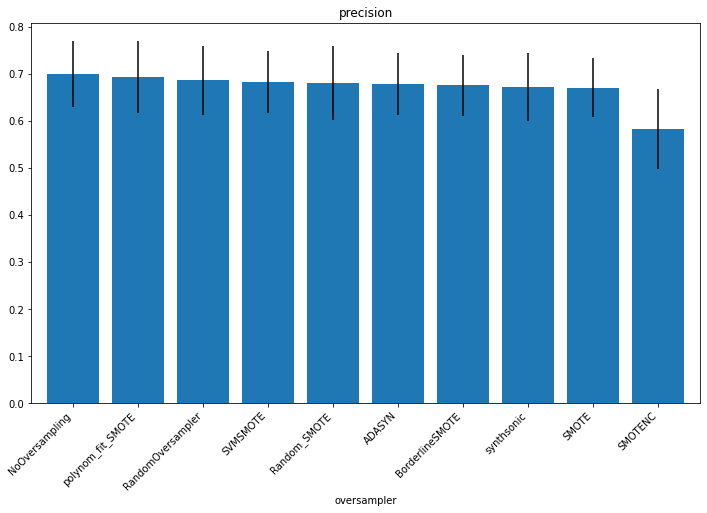

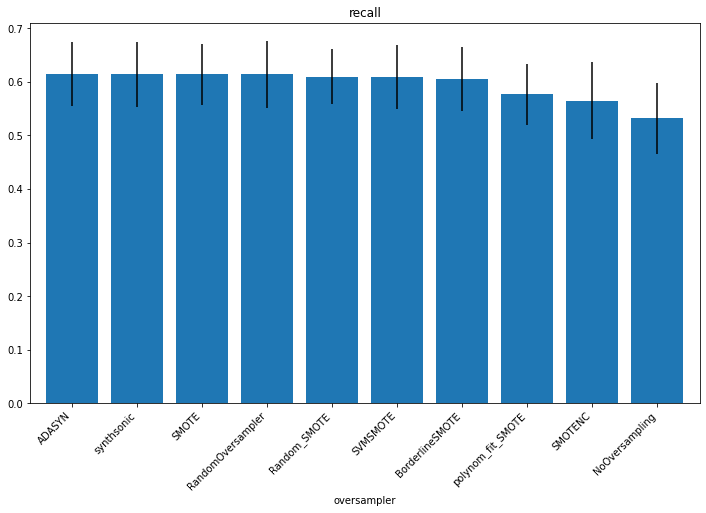

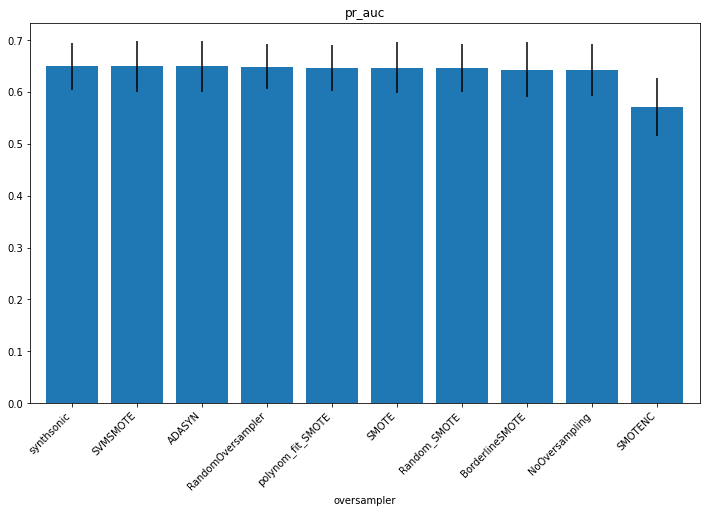

In [34]:
Path.mkdir(plot_folder.joinpath('Total'), exist_ok=True)
out = plot_folder.joinpath('Total')
metrics = ['balanced_accuracy','G_mean','f1','precision','recall','pr_auc']

for metric in metrics :
    fig, ax = HR.plot_bar_metric(df, metric)
    
    fig.savefig(out.joinpath(f'total_{metric}.svg'), bbox_inches='tight')

# Bars categorical

In [59]:
cats = list(df_info.loc[df_info['numerical_features'] < df_info['categorical_features'],'dataset'])
df_c = df[df['dataset'].isin(cats)]
df_c = df_c.loc[df_c['oversampler'] != 'SMOTENC', :]

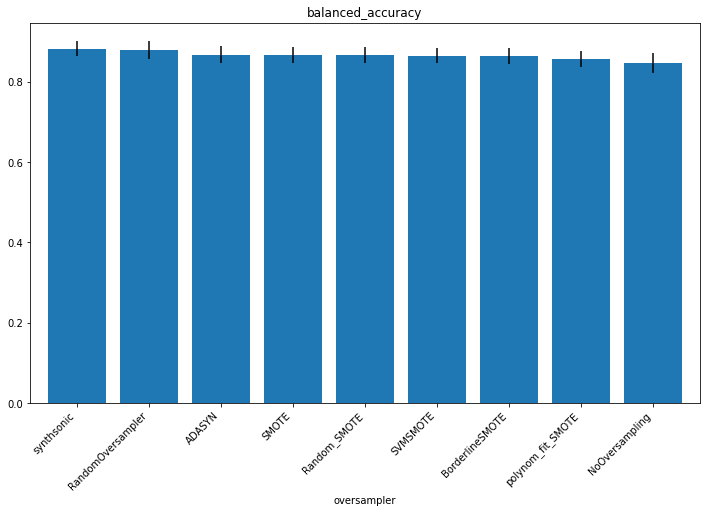

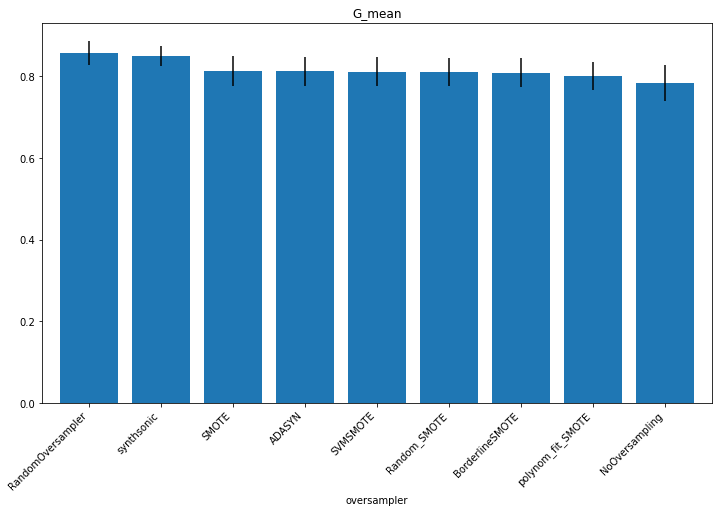

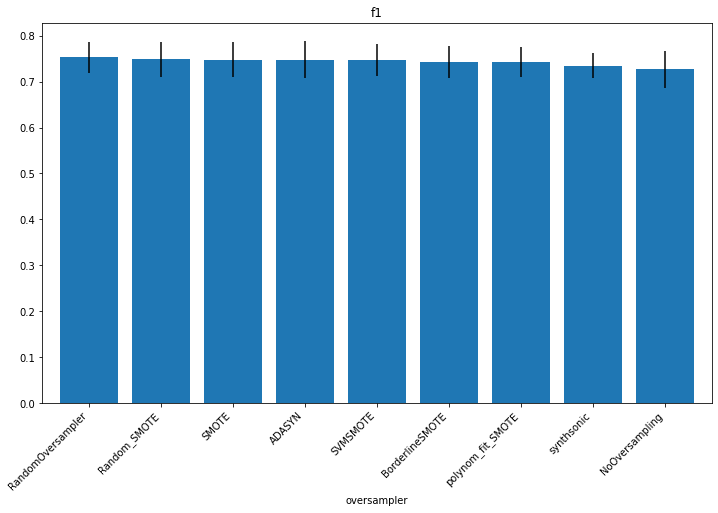

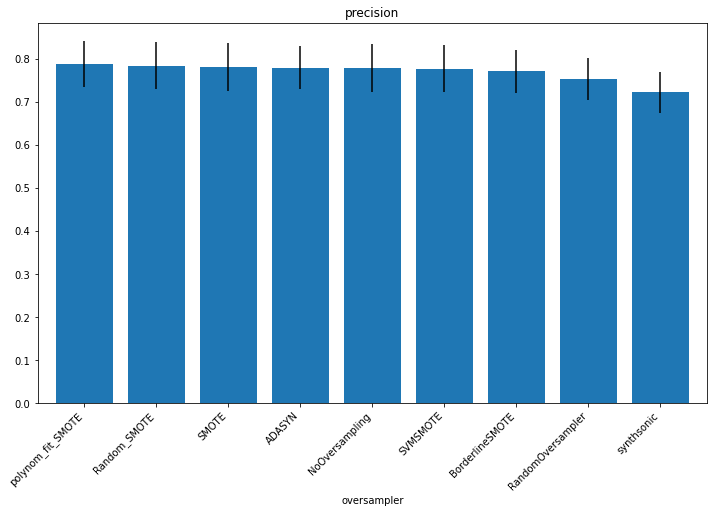

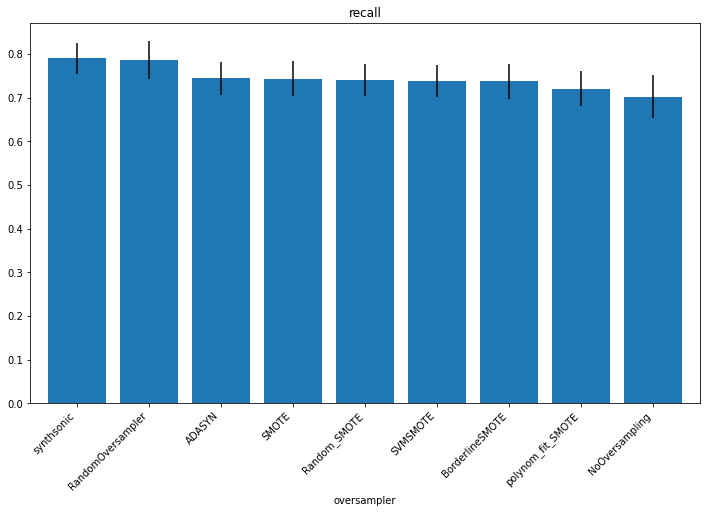

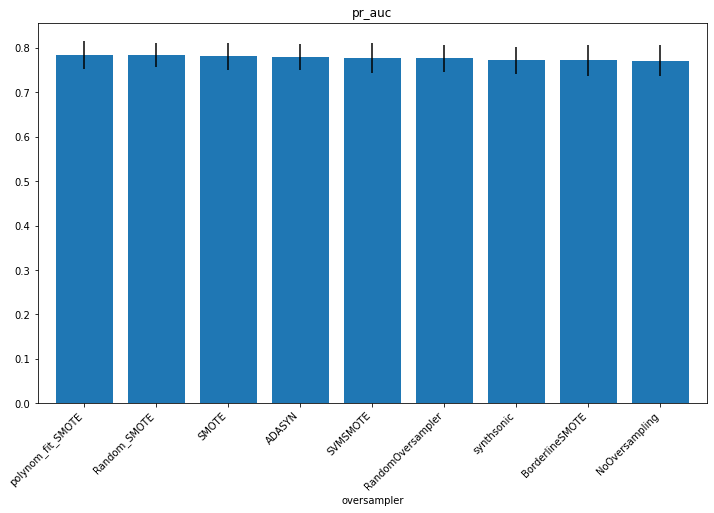

In [61]:
kind = 'Categorical'
Path.mkdir(plot_folder.joinpath(kind), exist_ok=True)
out = plot_folder.joinpath(kind)
metrics = ['balanced_accuracy','G_mean','f1','precision','recall','pr_auc']

for metric in metrics :
    fig, ax = HR.plot_bar_metric(df_c, metric)
    
    fig.savefig(out.joinpath(f'{kind}_{metric}.svg'), bbox_inches='tight')

# Bars numerical

In [62]:
nums = list(df_info.loc[df_info['numerical_features'] > df_info['categorical_features'],'dataset'])
df_n = df[df['dataset'].isin(nums)]

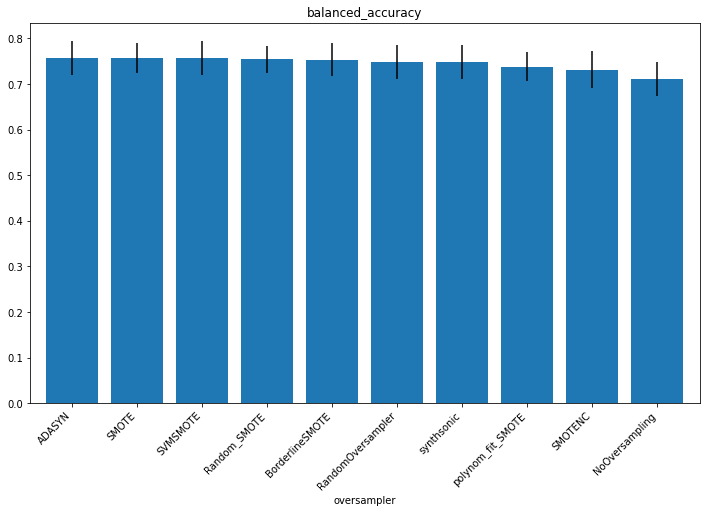

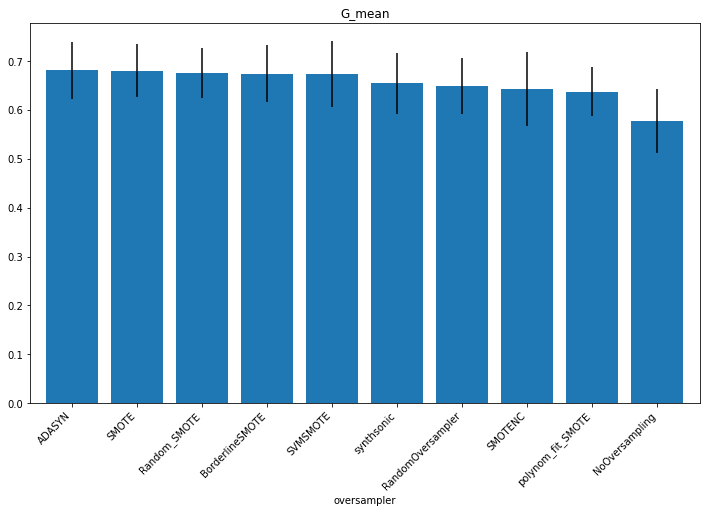

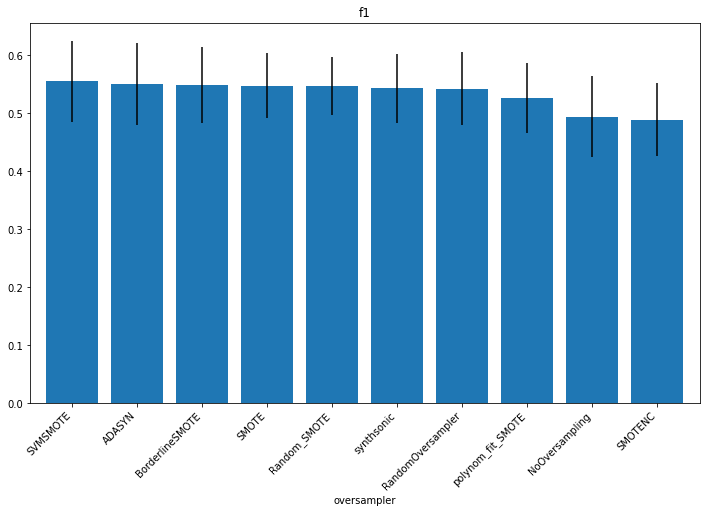

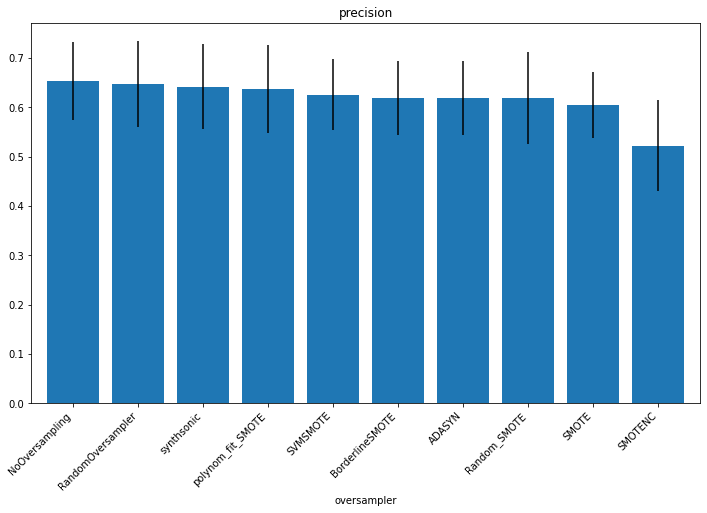

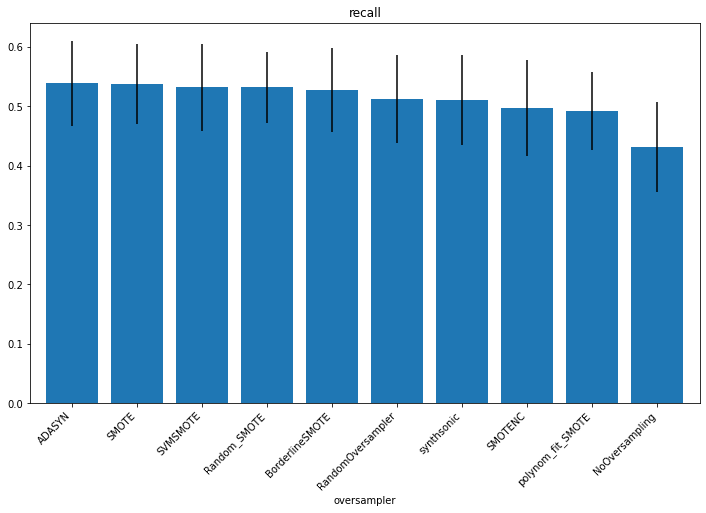

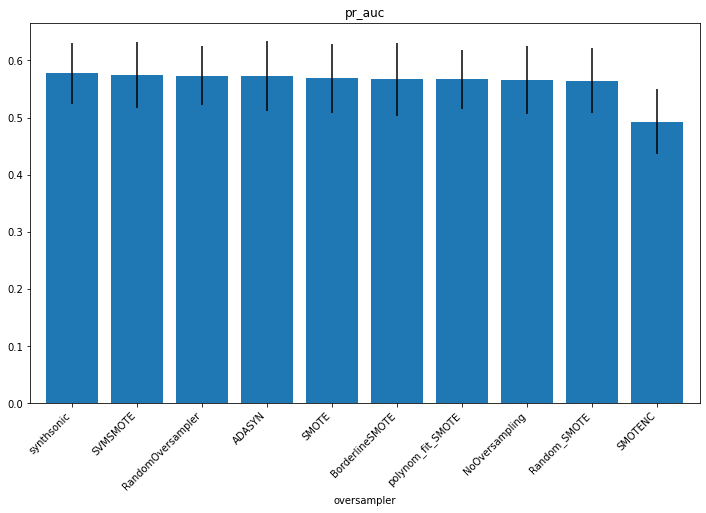

In [63]:
kind = 'Numerical'
Path.mkdir(plot_folder.joinpath(kind), exist_ok=True)
out = plot_folder.joinpath(kind)
metrics = ['balanced_accuracy','G_mean','f1','precision','recall','pr_auc']

for metric in metrics :
    fig, ax = HR.plot_bar_metric(df_n, metric)
    
    fig.savefig(out.joinpath(f'{kind}_{metric}.svg'), bbox_inches='tight')

# Bars mixed

In [73]:
mix = list(df_info.loc[df_info.type == 'mixed','dataset'])
df_m = df[df['dataset'].isin(mix)]

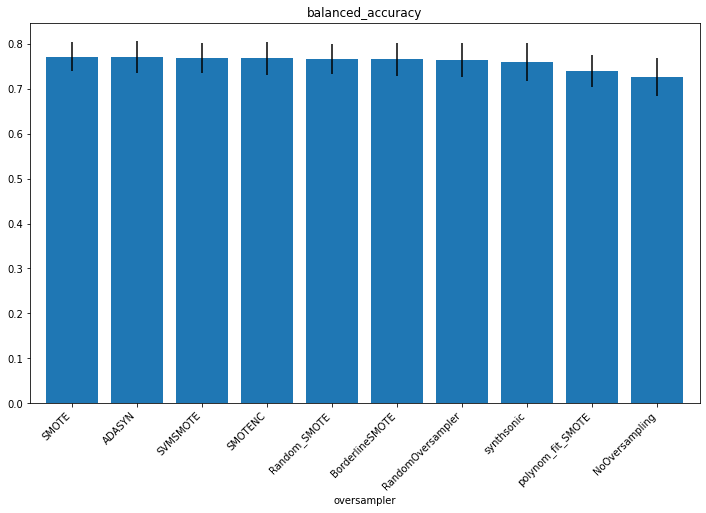

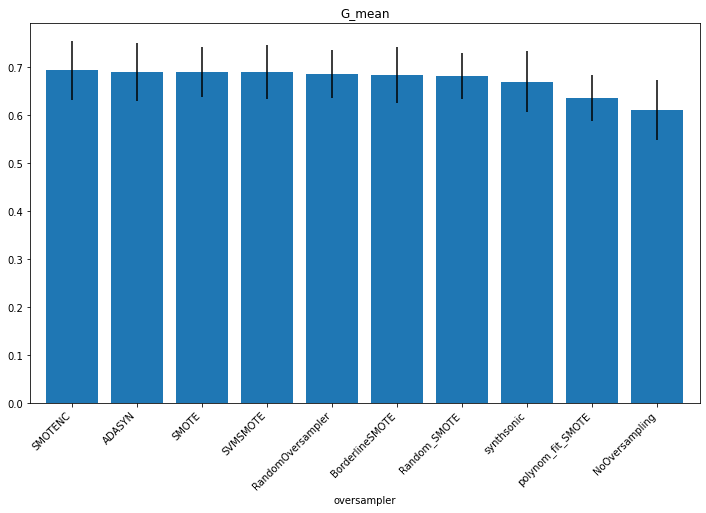

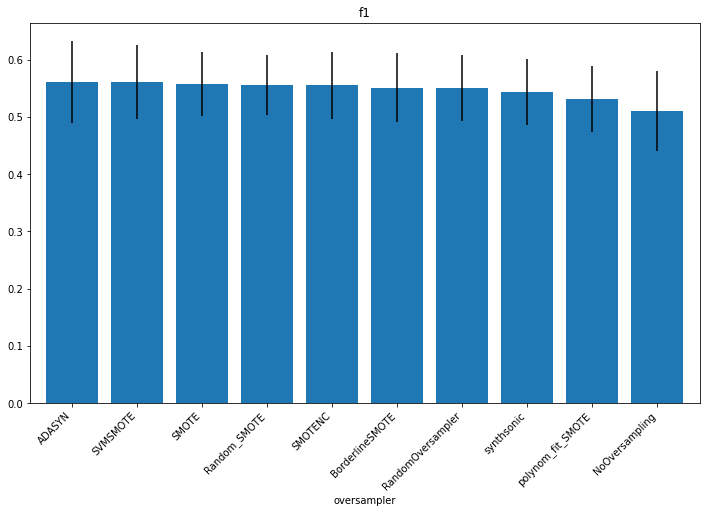

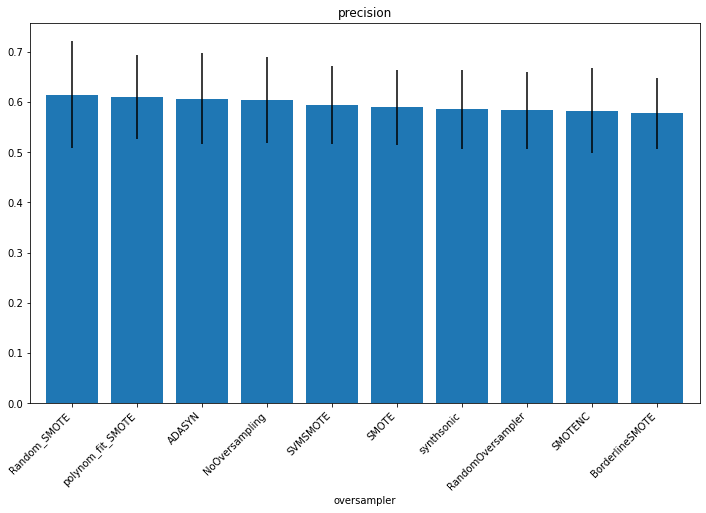

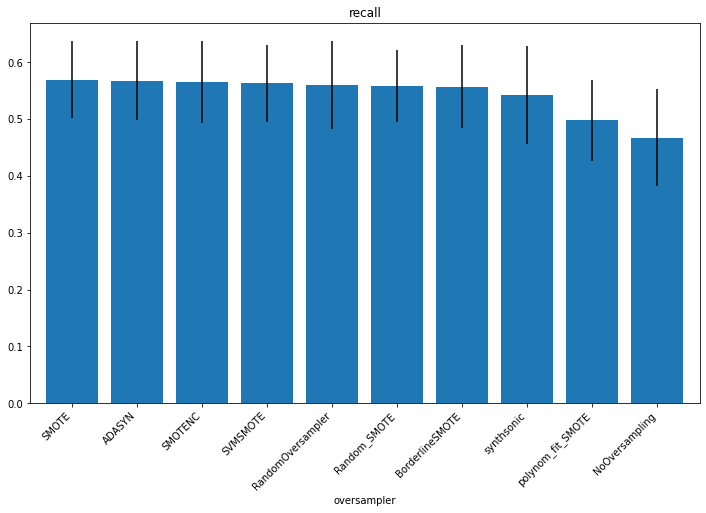

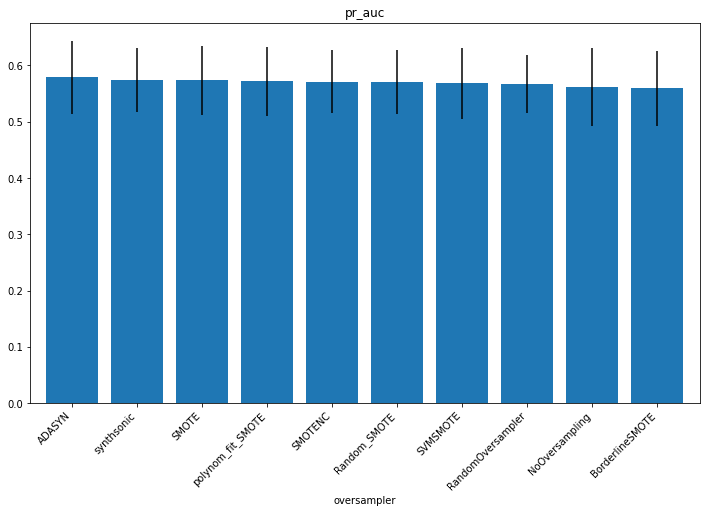

In [75]:
kind = 'Mixed'
Path.mkdir(plot_folder.joinpath(kind), exist_ok=True)
out = plot_folder.joinpath(kind)
metrics = ['balanced_accuracy','G_mean','f1','precision','recall','pr_auc']

for metric in metrics :
    fig, ax = HR.plot_bar_metric(df_m, metric)
    
    fig.savefig(out.joinpath(f'{kind}_{metric}.svg'), bbox_inches='tight')